# Zomato Data Analysis

# This Project is to solve business problem of Zomato related to 
## • Understanding which type of restaurant is most popular helps Zomato focus its marketing efforts, promotions on these categories and potential areas for improvement..
## • Knowing the number of votes helps Zomato assess the level of customer engagement and feedback for various restaurant types. This can be used to prioritize customer support and improve service for the types that receive fewer votes.
## •Understanding the typical ratings helps Zomato overview overall restaurant performance and customer satisfaction. It also assists in identifying trends in customer preferences and potential areas for improvement.
## •knowing the average spending of couples who order online, this helps Zomato to tailor promotions and discounts to increase order volume and optimize revenue. This insight helps in designing targeted marketing strategies and special offers.
## •Identifying the preferred mode of ordering(offline or online) allows Zomato to focus on improving the higher-rated mode or addressing issues with the lower-rated mode. It can help in resource allocation and improving customer satisfaction across different ordering channels.
## •Knowing which restaurant types are popular for offline orders, which allows Zomato to design targeted promotions and offers to drive traffic to these locations.Which can help attract more customers to physical restaurants and enhance overall engagement with the platform.
# OVERVIEW
# •Customer Preferences and Popularity •Engagement and Feedback •Spending Behavior •Order Modes •Targeted Offers

# Step 1 : Importing Library

In [13]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Importing Data

In [15]:
os.chdir('/Users/navneetnautiyal/Documents/Pandas')

In [16]:
dataframe=pd.read_csv('Zomato.csv')
dataframe.head()

,name,online_order,book_table,rate,votes,approx_cost(for two people),listed_in(type)
0,Jalsa,Yes,Yes,4.1/5,775,800,Buffet
1,Spice Elephant,Yes,No,4.1/5,787,800,Buffet
2,San Churro Cafe,Yes,No,3.8/5,918,800,Buffet
3,Addhuri Udupi Bhojana,No,No,3.7/5,88,300,Buffet
4,Grand Village,No,No,3.8/5,166,600,Buffet


In [20]:
dataframe

,name,online_order,book_table,rate,votes,approx_cost(for two people),listed_in(type)
0,Jalsa,Yes,Yes,4.1/5,775,800,Buffet
1,Spice Elephant,Yes,No,4.1/5,787,800,Buffet
2,San Churro Cafe,Yes,No,3.8/5,918,800,Buffet
3,Addhuri Udupi Bhojana,No,No,3.7/5,88,300,Buffet
4,Grand Village,No,No,3.8/5,166,600,Buffet
...,...,...,...,...,...,...,...
143,Melting Melodies,No,No,3.3/5,0,100,Dining
144,New Indraprasta,No,No,3.3/5,0,150,Dining
145,Anna Kuteera,Yes,No,4.0/5,771,450,Dining
146,Darbar,No,No,3.0/5,98,800,Dining


# 1) What is the popular type of restaurant do the majority of customers order from?

# Data Cleaning

## Converting data of column "rate"
    since it might act as a hurdel

In [25]:
def handlerate(value):
    value = str(value).split('/')
    value = value[0]
    return float(value)

dataframe['rate'] = dataframe['rate'].apply(handlerate)
print(dataframe.head())

                    name online_order book_table  rate  votes  \
0                  Jalsa          Yes        Yes   4.1    775   
1         Spice Elephant          Yes         No   4.1    787   
2        San Churro Cafe          Yes         No   3.8    918   
3  Addhuri Udupi Bhojana           No         No   3.7     88   
4          Grand Village           No         No   3.8    166   

   approx_cost(for two people) listed_in(type)  
0                          800          Buffet  
1                          800          Buffet  
2                          800          Buffet  
3                          300          Buffet  
4                          600          Buffet  


In [36]:
#checking for any missing vales
dataframe.info()
#we can see there is no missing data in our dataframe

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 148 entries, 0 to 147
Data columns (total 7 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   name                         148 non-null    object 
 1   online_order                 148 non-null    object 
 2   book_table                   148 non-null    object 
 3   rate                         148 non-null    float64
 4   votes                        148 non-null    int64  
 5   approx_cost(for two people)  148 non-null    int64  
 6   listed_in(type)              148 non-null    object 
dtypes: float64(1), int64(2), object(4)
memory usage: 8.2+ KB


### Type of resturant

In [39]:
dataframe.head()

,name,online_order,book_table,rate,votes,approx_cost(for two people),listed_in(type)
0,Jalsa,Yes,Yes,4.1,775,800,Buffet
1,Spice Elephant,Yes,No,4.1,787,800,Buffet
2,San Churro Cafe,Yes,No,3.8,918,800,Buffet
3,Addhuri Udupi Bhojana,No,No,3.7,88,300,Buffet
4,Grand Village,No,No,3.8,166,600,Buffet


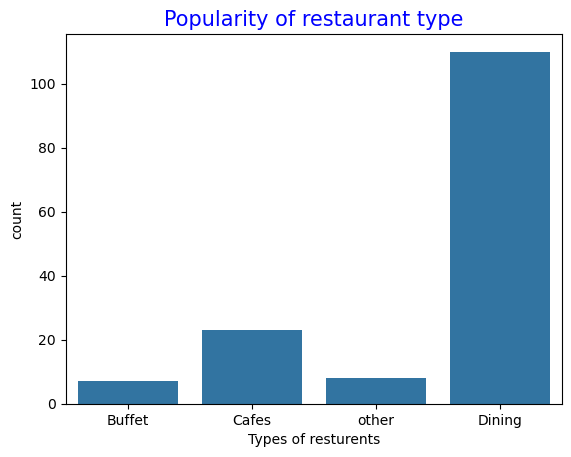

In [38]:
sns.countplot(x=dataframe['listed_in(type)'])
plt.title('Popularity of restaurant type',size=15,c='b')
plt.xlabel('Types of resturents')
plt.show()

## Conclusion:
# Dining type of restaurant is most popular among customers

# Q2) How many votes has each type of restaurant received from customers?

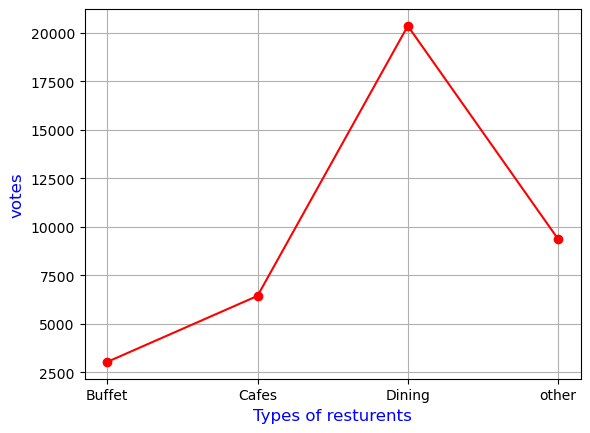

In [145]:
grouped_data=dataframe.groupby('listed_in(type)')['votes'].sum()
result = pd.DataFrame({'votes': grouped_data})
plt.plot(result,color='r',marker='o')
plt.xlabel('Types of resturents',size=12,c='b')
plt.ylabel('votes',size=12,c='b')
plt.grid(True)
plt.show()

## Conclusion (number of votes):
### Dining = 20000+ (max)
### Others = 8000+
### Cafes = 6000+
### Buffet = 2500+ (min)

# Q3) What are the ratings that the majority of restaurants have received?

In [176]:
dataframe.head()

,name,online_order,book_table,rate,votes,approx_cost(for two people),listed_in(type)
0,Jalsa,Yes,Yes,4.1,775,800,Buffet
1,Spice Elephant,Yes,No,4.1,787,800,Buffet
2,San Churro Cafe,Yes,No,3.8,918,800,Buffet
3,Addhuri Udupi Bhojana,No,No,3.7,88,300,Buffet
4,Grand Village,No,No,3.8,166,600,Buffet


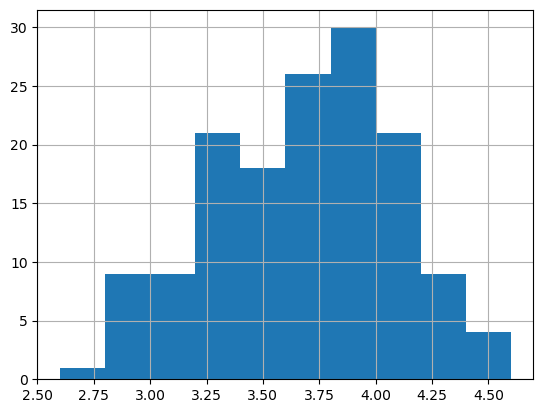

In [205]:
plt.hist(dataframe['rate'],bins=10)
plt.grid(True)
plt.show()

## Conclusion#
### Majority of restaurants have received ratings 3.5 to 4

# Q4) Zomato has observed that most couples order most of their food online. What is th average spending on each order?

In [244]:
dataframe.head(10)

,name,online_order,book_table,rate,votes,approx_cost(for two people),listed_in(type)
0,Jalsa,Yes,Yes,4.1,775,800,Buffet
1,Spice Elephant,Yes,No,4.1,787,800,Buffet
2,San Churro Cafe,Yes,No,3.8,918,800,Buffet
3,Addhuri Udupi Bhojana,No,No,3.7,88,300,Buffet
4,Grand Village,No,No,3.8,166,600,Buffet
5,Timepass Dinner,Yes,No,3.8,286,600,Buffet
6,Rosewood International Hotel - Bar & Restaurant,No,No,3.6,8,800,Buffet
7,Onesta,Yes,Yes,4.6,2556,600,Cafes
8,Penthouse Cafe,Yes,No,4.0,324,700,other
9,Smacznego,Yes,No,4.2,504,550,Cafes


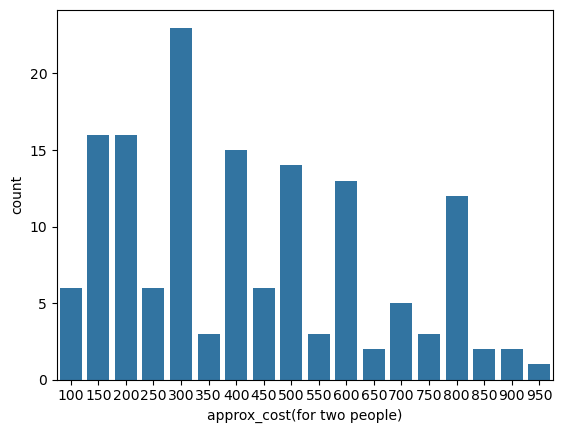

In [219]:
count_data=dataframe['approx_cost(for two people)']
sns.countplot(x=count_data)
plt.show()

## average spending on each order on all orders = Rs.300 (approx)

In [234]:
dataframe['online_order'].value_counts()

online_order
No     90
Yes    58
Name: count, dtype: int64

In [246]:
filtered_df=dataframe[dataframe['online_order']== 'Yes']

In [248]:
filtered_df.head()

,name,online_order,book_table,rate,votes,approx_cost(for two people),listed_in(type)
0,Jalsa,Yes,Yes,4.1,775,800,Buffet
1,Spice Elephant,Yes,No,4.1,787,800,Buffet
2,San Churro Cafe,Yes,No,3.8,918,800,Buffet
5,Timepass Dinner,Yes,No,3.8,286,600,Buffet
7,Onesta,Yes,Yes,4.6,2556,600,Cafes


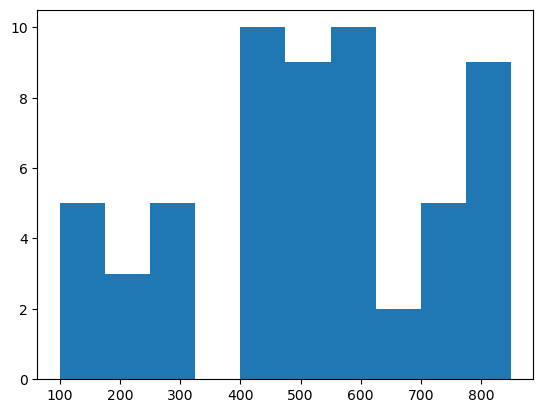

In [268]:

plt.hist(filtered_df['approx_cost(for two people)'],bins=10)
plt.show()

# Conclusion:
## average spending on all orders = Rs.300 (approx)
## average spending on online orders = Rs.400-Rs.600

# Q5) Which mode (online or offline) has received the maximum rating?

In [282]:
dataframe.head()

,name,online_order,book_table,rate,votes,approx_cost(for two people),listed_in(type)
0,Jalsa,Yes,Yes,4.1,775,800,Buffet
1,Spice Elephant,Yes,No,4.1,787,800,Buffet
2,San Churro Cafe,Yes,No,3.8,918,800,Buffet
3,Addhuri Udupi Bhojana,No,No,3.7,88,300,Buffet
4,Grand Village,No,No,3.8,166,600,Buffet


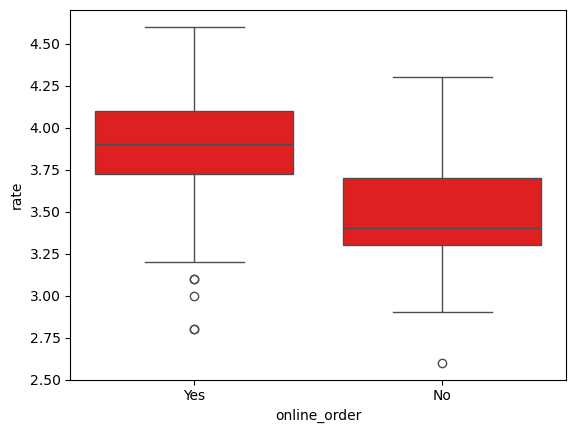

In [296]:
sns.boxplot(x='online_order',y='rate',data=dataframe,color='r')
plt.show()

# Conclusion:
## Online orders receives more ratings then offline orders

# Q6) Which type of restaurant received more offline orders, so that Zomato can customers with some good offers?

In [337]:
pivot_table=dataframe.pivot_table(index='listed_in(type)',columns='online_order',aggfunc='size')
print(pivot_table)

online_order     No  Yes
listed_in(type)         
Buffet            3    4
Cafes             8   15
Dining           77   33
other             2    6


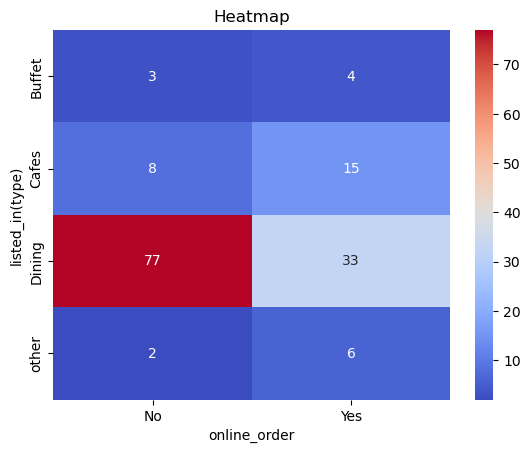

In [339]:
pivot_table=dataframe.pivot_table(index='listed_in(type)',columns='online_order',aggfunc='size')
sns.heatmap(pivot_table,cmap='coolwarm',annot=True,fmt='d')
plt.title('Heatmap')
plt.show()

# Conclusion:
## Dining Restaurants have maximum offline orders
## Whereas cafe,buffet and others have more online orders